**Exercise set 7**
==============

> The goal of this exercise is to run PCA and PLSR on a real
data set in order to show how these methods can be used in practice.
We are considering data that are given by
[Platikanov et al.](https://doi.org/10.1016/j.watres.2012.10.040) and we are aiming to
reproduce some of the results found in their work. You may find it useful to
inspect this article when interpreting your results.

**Exercise 7.1**

In this exercise, we will consider two data sets: one set contains data for bottled mineral water
(we will call this "data set 1"),
and the other set contains data for tap water and bottled water (we will call this "data set 2").

The different water samples have been blind-tasted
by trained panelists, who have rated the different water samples
according to their liking. Also, the chemical compositions of the
samples have been determined. All measured quantities are given
in table 1.

Our end goal is to predict the ratings (the "mean liking" in
table 1) of the water samples, given
measurements of the chemical composition. We will define this rating as the
$y$-variable we are going to predict.

|Variable| Unit|
|:-------|----:|
 |Conductivity                       | ($\mu$S/cm)  |
 |TDS (total dissolved solids)       | (mg/L)       |
 |Cl$^{-}$                            | (mg/L)      |
 |SO$_4^{2-}$                         | (mg/L)      |
 |NO$_3^-$                            | (mg/L)      |
 |HCO$_3^-$                           | (mg/L)      |
 |Ca$^{2+}$                           | (mg/L)      |
 |Mg$^{2+}$                           | (mg/L)      |
 |Na$^{+}$                            | (mg/L)      |
 |K$^{+}$                             | (mg/L)      |
 |pH                                  |             |
 |Si                                  | (mg/L)      |
 |Cl$_2$                              | (mg/L)      |
 |Mean liking                         |             |
 | **Table 1:** *Data columns present in the data sets: [Data/table1.csv](Data/table1.csv) and  [Data/table2.csv](Data/table2.csv)* |

**(a)** Begin by exploring the raw data. In the [original article](https://doi.org/10.1016/j.watres.2012.10.040),
      you can find correlation heat maps (see Fig. $1$ in the aforementioned article). 
      Create such correlation maps yourself (for data set 1 & 2)
      and compare them with Fig. $1$ in the article. Does the mean liking
      seem to be correlated with some of the variables?

In [1]:
import pandas as pd

# Load the data
data1 = pd.read_csv("Data/table1.csv")
data2 = pd.read_csv("Data/table2.csv")

# Get the correlation coefficients
df1 = data1.corr()
df2 = data2.corr()

# Calculate needed extension to scale colorbar to [1, -1]
# double min() or max() needed as 1st one will give min/max value per column 
# 2nd one will give the min/max out of the first one
mi = df1.min().min()
ma = df1.max().max()
diff = ma-mi
low = (1.0-abs(mi))/diff # Scale color bar to -1; 
high = (1.0-abs(ma))/diff # And to 1

# Output correlations 1, 
# axis=None applies colormap to the whole dataframe instead of column by column
df1.style.background_gradient(cmap='bwr', low=low, high=high, axis=None)

,Conductivity (μS/cm),TDS (mg/L),Cl{−} (mg/L),SO4{2-} (mg/L),NO3{-} (mg/L),HCO3{-} (mg/L),Ca{2+} (mg/L),Mg{2+} (mg/L),Na{+} (mg/L),K{+} (mg/L),pH,Si (mg/L),Mean liking
Conductivity (μS/cm),1,0.971414,0.146592,0.78107,0.127197,0.542983,0.840503,0.724088,-0.00673548,0.422937,0.267041,0.0782362,-0.200903
TDS (mg/L),0.971414,1,0.00638177,0.898058,0.0681542,0.450074,0.918279,0.744162,-0.111195,0.380555,0.244034,-0.0150842,-0.0850717
Cl{−} (mg/L),0.146592,0.00638177,1,-0.260588,0.41965,-0.258356,-0.337328,-0.395083,0.563638,0.0122049,-0.276178,0.370616,-0.67225
SO4{2-} (mg/L),0.78107,0.898058,-0.260588,1,-0.105747,0.181948,0.933347,0.68414,-0.307275,0.198662,0.168549,-0.23328,0.160274
NO3{-} (mg/L),0.127197,0.0681542,0.41965,-0.105747,1,0.0928365,0.0141355,0.0563141,0.140189,-0.142107,-0.49148,0.0436506,-0.532665
HCO3{-} (mg/L),0.542983,0.450074,-0.258356,0.181948,0.0928365,1,0.480874,0.710817,-0.0864654,0.449412,0.46657,0.141476,-0.0322324
Ca{2+} (mg/L),0.840503,0.918279,-0.337328,0.933347,0.0141355,0.480874,1,0.878367,-0.39236,0.200673,0.285106,-0.289388,0.180667
Mg{2+} (mg/L),0.724088,0.744162,-0.395083,0.68414,0.0563141,0.710817,0.878367,1,-0.486243,0.0596825,0.381125,-0.384486,0.114643
Na{+} (mg/L),-0.00673548,-0.111195,0.563638,-0.307275,0.140189,-0.0864654,-0.39236,-0.486243,1,0.428716,-0.187603,0.762044,-0.531986
K{+} (mg/L),0.422937,0.380555,0.0122049,0.198662,-0.142107,0.449412,0.200673,0.0596825,0.428716,1,0.300897,0.803203,-0.131162


In [2]:
# Get high/low extension again
mi = df2.min().min()
ma = df2.max().max()
diff = ma-mi
low = (1.0-abs(mi))/diff # Scale color bar to -1; 
high = (1.0-abs(ma))/diff # And to 1

# output correlations 2
df2.style.background_gradient(cmap='bwr', low=low, high=high, axis=None)

,Conductivity (μS/cm),TDS (mg/L),Cl{−} (mg/L),SO4{2-} (mg/L),NO3{-} (mg/L),HCO3{-} (mg/L),Ca{2+} (mg/L),Mg{2+} (mg/L),Na{+} (mg/L),K{+} (mg/L),pH,Si (mg/L),Cl2 (mg/L),Mean liking
Conductivity (μS/cm),1,0.991922,0.828366,0.84586,0.867863,0.642527,0.845486,0.885181,0.779763,0.588881,0.0494859,0.0763612,0.308891,-0.858703
TDS (mg/L),0.991922,1,0.764354,0.901059,0.878356,0.669408,0.897581,0.924846,0.725487,0.513326,0.0388625,0.0631391,0.298188,-0.819744
Cl{−} (mg/L),0.828366,0.764354,1,0.476916,0.652865,0.232569,0.428978,0.536609,0.895437,0.681121,-0.126244,0.054996,0.256435,-0.840321
SO4{2-} (mg/L),0.84586,0.901059,0.476916,1,0.772374,0.613981,0.947195,0.920452,0.44302,0.247879,0.030586,-0.0703624,0.22712,-0.610453
NO3{-} (mg/L),0.867863,0.878356,0.652865,0.772374,1,0.621999,0.832783,0.887262,0.633246,0.39625,-0.0285329,0.0248952,0.506853,-0.79795
HCO3{-} (mg/L),0.642527,0.669408,0.232569,0.613981,0.621999,1,0.772296,0.723618,0.289722,0.239214,0.411883,0.290293,0.288186,-0.388198
Ca{2+} (mg/L),0.845486,0.897581,0.428978,0.947195,0.832783,0.772296,1,0.949044,0.401177,0.276937,0.121908,-0.0669788,0.353801,-0.614299
Mg{2+} (mg/L),0.885181,0.924846,0.536609,0.920452,0.887262,0.723618,0.949044,1,0.517052,0.351042,0.132925,-0.0566002,0.277477,-0.643258
Na{+} (mg/L),0.779763,0.725487,0.895437,0.44302,0.633246,0.289722,0.401177,0.517052,1,0.600423,-0.164093,0.307318,0.154932,-0.76224
K{+} (mg/L),0.588881,0.513326,0.681121,0.247879,0.39625,0.239214,0.276937,0.351042,0.600423,1,0.233301,-0.147838,0.28345,-0.692321


<ipython-input-3-ae70c3889fce>:23: UserWarning: tight_layout : falling back to Agg renderer
  fig.tight_layout()


Dataset 1


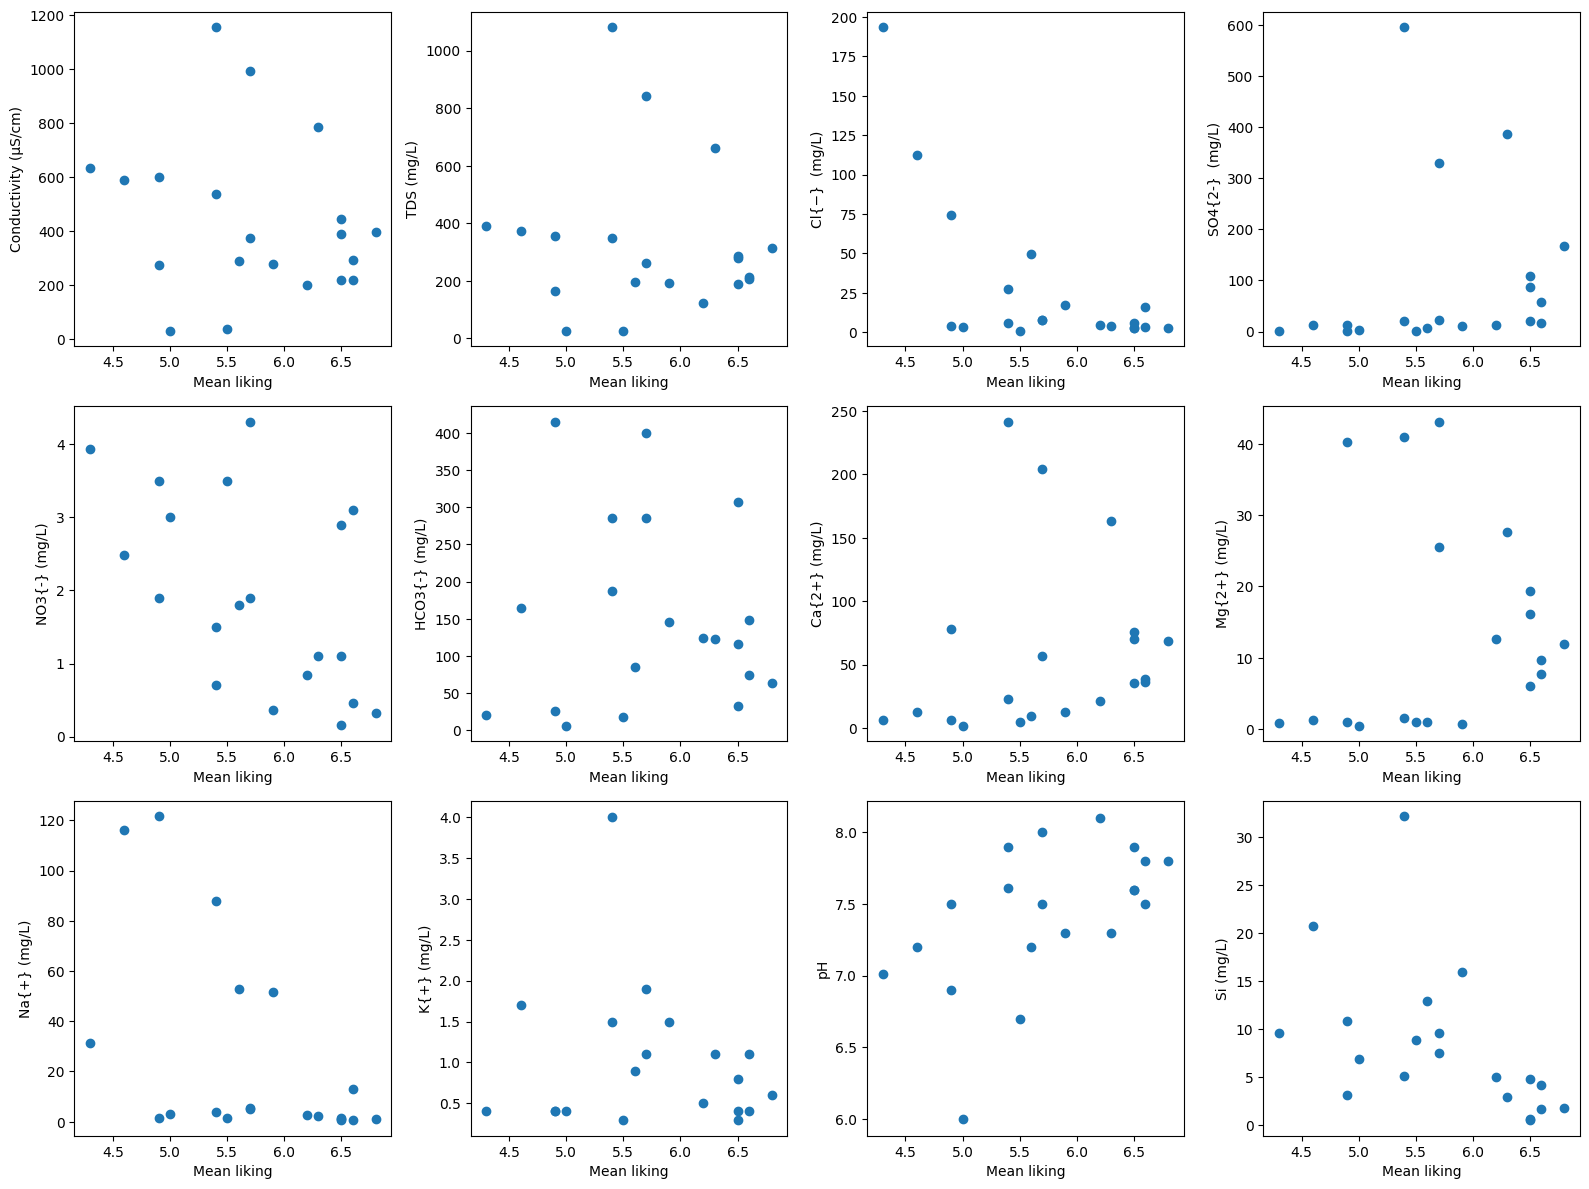

In [3]:
%matplotlib notebook
# Also make some scatter plots for the variables vs mean liking of the data sets
import matplotlib.pyplot as plt

datas = [data1, data2]
figs = []
for j, data in enumerate(datas):
    Y = data['Mean liking'] # Select Y data 
    Xs = [i for i in data.columns if i not in ["Mean liking", "Labels"]] # Select all other variables
    n_plots = len(Xs) # get number of plots
    cols = 4
    rows, i = divmod(n_plots, cols)# get number of row plots
    if i != 0:
        rows += 1
    
    fig = plt.Figure(figsize=(4*cols, 4*rows))
    for i, var in enumerate(Xs):
        X = data[var]
        ax = fig.add_subplot(rows, cols, i+1)
        ax.scatter(Y, X) #We want Y on the x axis and X on the y-axis
        ax.set_xlabel("Mean liking")
        ax.set_ylabel(var)
    fig.tight_layout()
    figs.append(fig)

# Output figure for data set 1
print("Dataset 1")
figs[0]

Dataset 2


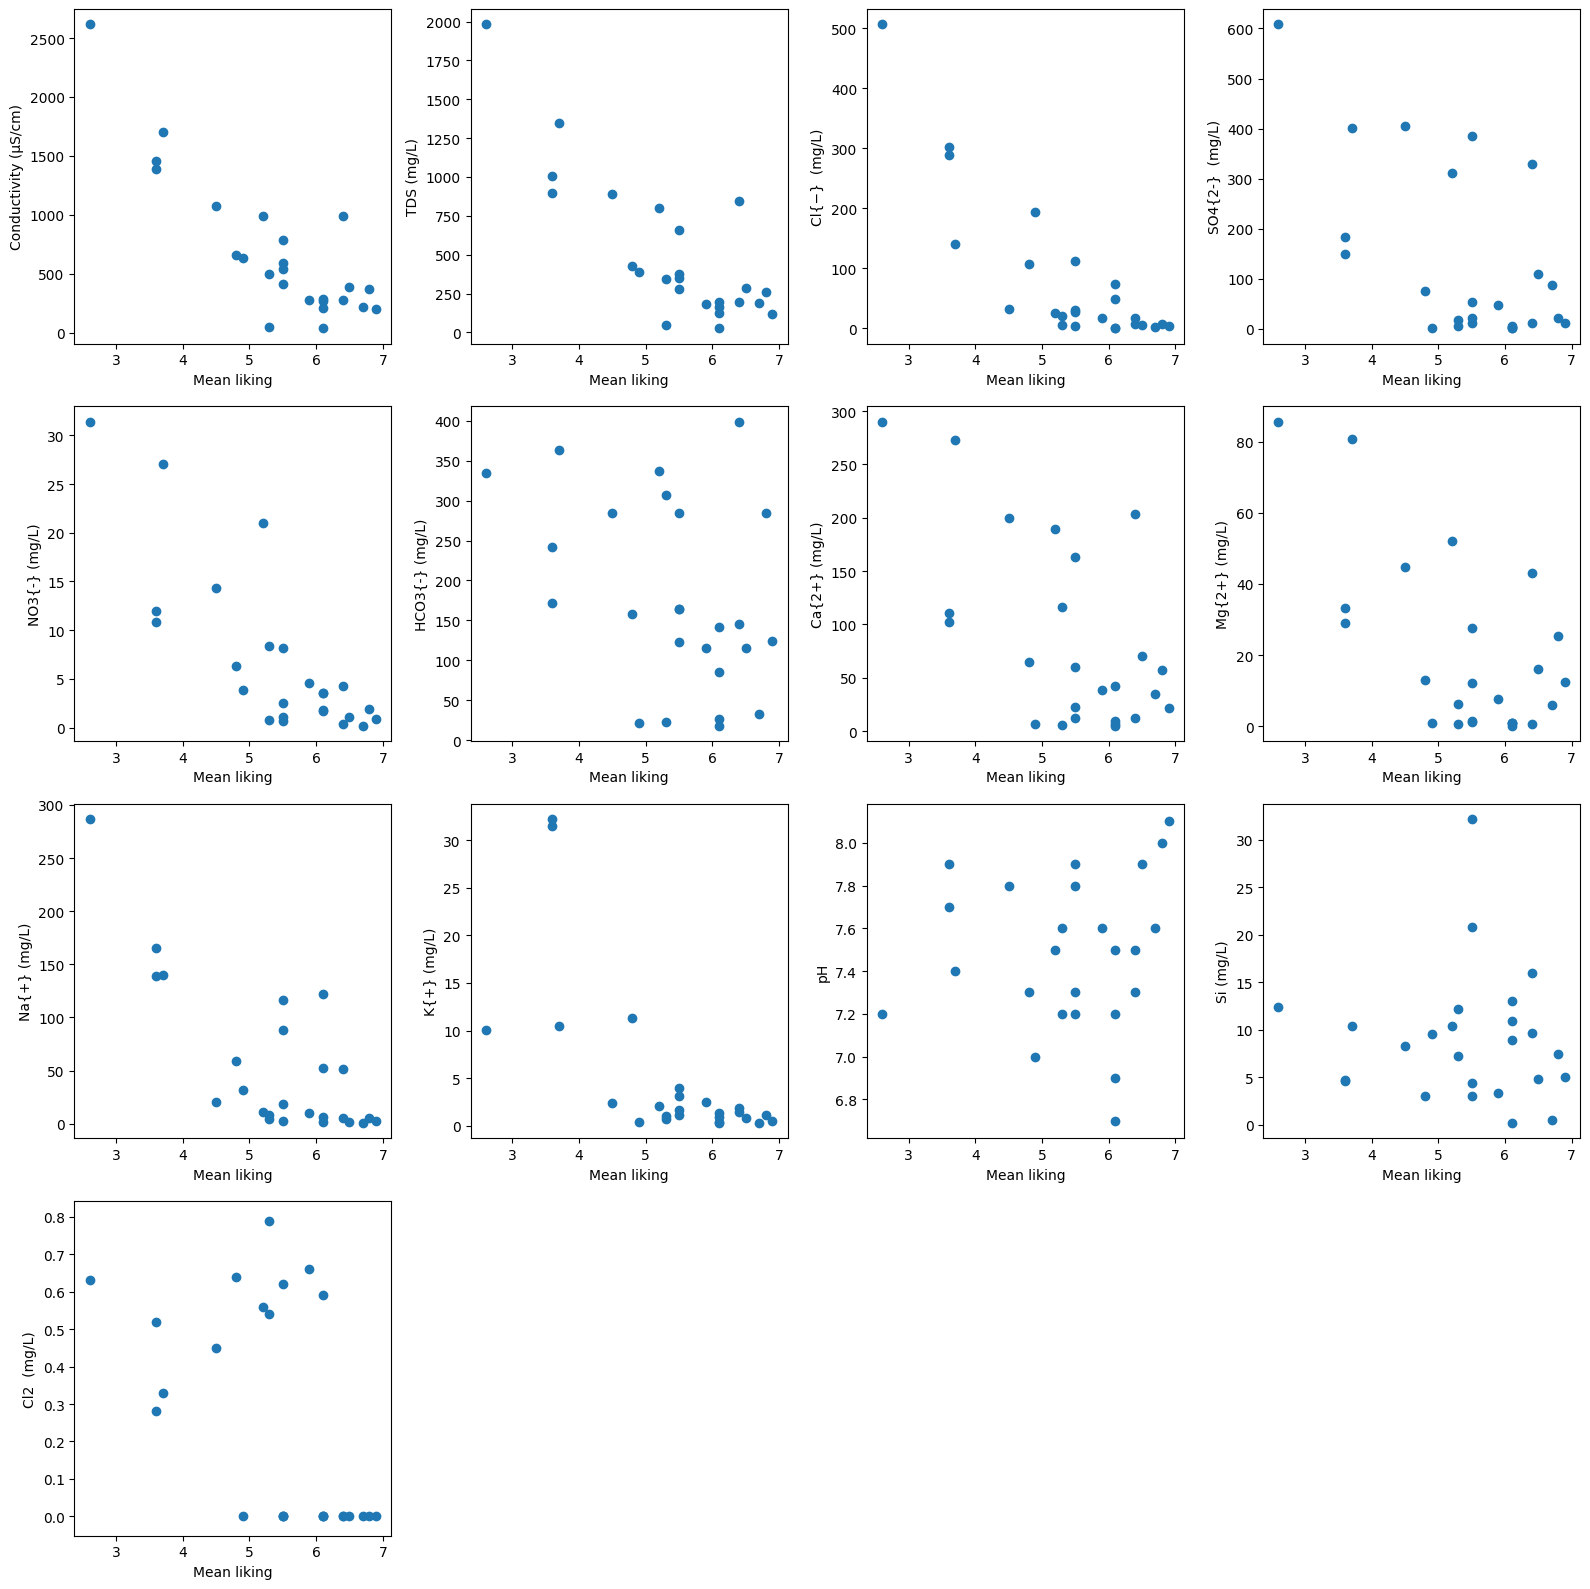

In [4]:
# Output figure for dataset 2
print("Dataset 2")
figs[1]

**Answer to question 7.1(a):** Pairwise pearson correlation coefficients for the variables are
shown above for the two data sets. These compare well with the figures given in the original

From these figures we find:
* For data set 1, we find positive correlations between some of the ions (for instance for Mg$^{2+}$,
  Ca$^{2+}$ and SO$_4^{2-}$) and negative for others (for instance for Mg$^{2+}$ and Na$^+$).        
  We also see that there are high correlations between the conductivity and some of the
  ions, in particular the divalent ions, and between the conductivity and the total dissolved        
  solids (TDS) variable.
          
  For the mean liking, we find here that it is negatively correlated with the amount
  of Cl$^-$, NO$_3^-$, Na$^+$, and Si, and positively correlated with the pH.


* For data set 2, we find positive correlations between many of the ions (see the large
  "red" area in the figure of `df2`. We also see that there is still high correlations
  between the conductivity and the ions, and between
  the conductivity and TDS.

  For the mean liking, we see strong negative correlations between it and
  most of the other varibles. In this case there is only a weak positive correlation
  with the pH.


To further explore the possible correlations between the mean liking and the
other variables, we also considered some scatter plots shown above

For data set 1, we see some correlations beteen the mean liking and the
other variables (for instance for pH), but the correlations are not very
strong, as we already have seen in the correlation figure.

For data set 2, we see stronger correlations between mean liking and the
other variables (for instance the amount of Na$^+$), in agreement with
what we already have seen in the correlation figure.

In summary:

* In data set 1, the mean liking seems to be negatively correlated with
  the amount of Cl$^-$, NO$_3^-$, Na$^+$ and Si, and positively
  correlated with the pH.
  
  
* In data set 2, the mean liking seems to be negatively correlated with
  the amount of the ions, the conductivity, TDS and the amount of Cl$_2$.

**(b)** We will further explore the raw data with PCA. Perform a principal
      component analysis for data set 1 and for data set 2. How much of the variance is
      explained by the first two principal components? Also, plot the scores
      and the loadings for principal component 1 and 2, and for principal component 1 and 3.
      Does any of the variables seem to be correlated?
      Which variables seem to influence the mean liking most
      for the two data sets?

['Conductivity (μS/cm)', 'TDS (mg/L)', 'Cl{−}  (mg/L)', 'SO4{2-}  (mg/L)', 'NO3{-} (mg/L)', 'HCO3{-} (mg/L)', 'Ca{2+} (mg/L)', 'Mg{2+} (mg/L)', 'Na{+} (mg/L)', 'K{+} (mg/L)', 'pH', 'Si (mg/L)', 'Mean liking']
Dataset 1
Explained variance for PC0: 0.3965111943397455
Explained variance for PC1: 0.2511826831661893
Sum of explained variance: 0.6476938775059349


<ipython-input-5-b629031bb3b3>:69: UserWarning: tight_layout : falling back to Agg renderer
  fig.tight_layout()


['Conductivity (μS/cm)', 'TDS (mg/L)', 'Cl{−}  (mg/L)', 'SO4{2-}  (mg/L)', 'NO3{-} (mg/L)', 'HCO3{-} (mg/L)', 'Ca{2+} (mg/L)', 'Mg{2+} (mg/L)', 'Na{+} (mg/L)', 'K{+} (mg/L)', 'pH', 'Si (mg/L)', 'Cl2  (mg/L)', 'Mean liking']
Dataset 2
Explained variance for PC0: 0.5735599146414724
Explained variance for PC1: 0.13240938732218716
Sum of explained variance: 0.7059693019636595


<ipython-input-5-b629031bb3b3>:69: UserWarning: tight_layout : falling back to Agg renderer
  fig.tight_layout()


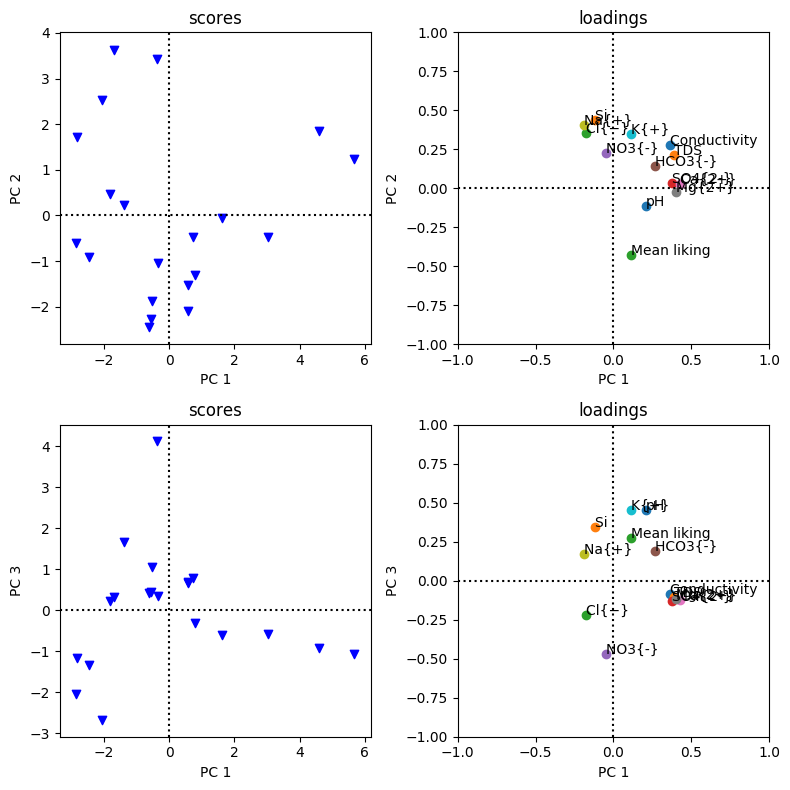

In [5]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import numpy as np

figs = []
for n, data in enumerate(datas):
    var = [i for i in data.columns if i not in ["Labels"]]
    label = data["Labels"]
    print(var)
    X = data[var]
    X = scale(X)
    pca = PCA()
    scores = pca.fit_transform(X)
    expl_var = pca.explained_variance_ratio_
    print("Dataset {}".format(n+1))
    s = 0
    for i, e in enumerate(expl_var[:2]):
        print("Explained variance for PC{}: {}".format(i, e))
        s += e
    print("Sum of explained variance: {}".format(s))
    loadings = pca.components_ 
    fig = plt.Figure(figsize=(8,8))
    titles = ['scores', 'loadings']
    for i, e in enumerate([scores.T, loadings]):
        ax = fig.add_subplot(2, 2, i+1)
        x = e[0]
        y = e[1]
        if i == 0:
            for j, (xj, yj) in enumerate(zip(x,y)):
                if 'tap' in label[j]:
                    marker = "s"
                else:
                    marker = "v"
                ax.scatter(xj, y[j], marker = marker, c='b')
        else:
            for j, name in enumerate(var):
                ax.scatter(x[j], y[j])
                ax.annotate(name.split('(')[0], (x[j], y[j]))
        ax.axhline(y=0.0, ls=':', color='k')
        ax.axvline(x=0.0, ls=':', color='k')
        ax.set_title(titles[i])
        ax.set_xlabel("PC 1")
        ax.set_ylabel("PC 2")
        if i == 1:
            ax.set_xlim(-1, 1)
            ax.set_ylim(-1, 1)
        ax = fig.add_subplot(2, 2, i+3)
        x = e[0]
        y = e[2]
        if i == 0:
            for j, (xj, yj) in enumerate(zip(x,y)):
                if 'tap' in label[j]:
                    marker = "s"
                else:
                    marker = "v"
                ax.scatter(xj, y[j], marker = marker, c='b')
        else:
            for j, name in enumerate(var):
                ax.scatter(x[j], y[j])
                ax.annotate(name.split('(')[0], (x[j], y[j]))
        ax.axhline(y=0.0, ls=':', color='k')
        ax.axvline(x=0.0, ls=':', color='k')
        ax.set_title(titles[i])
        ax.set_xlabel("PC 1")
        ax.set_ylabel("PC 3")
        if i == 1:
            ax.set_xlim(-1, 1)
            ax.set_ylim(-1, 1)
    fig.tight_layout()
    figs.append(fig)
figs[0]

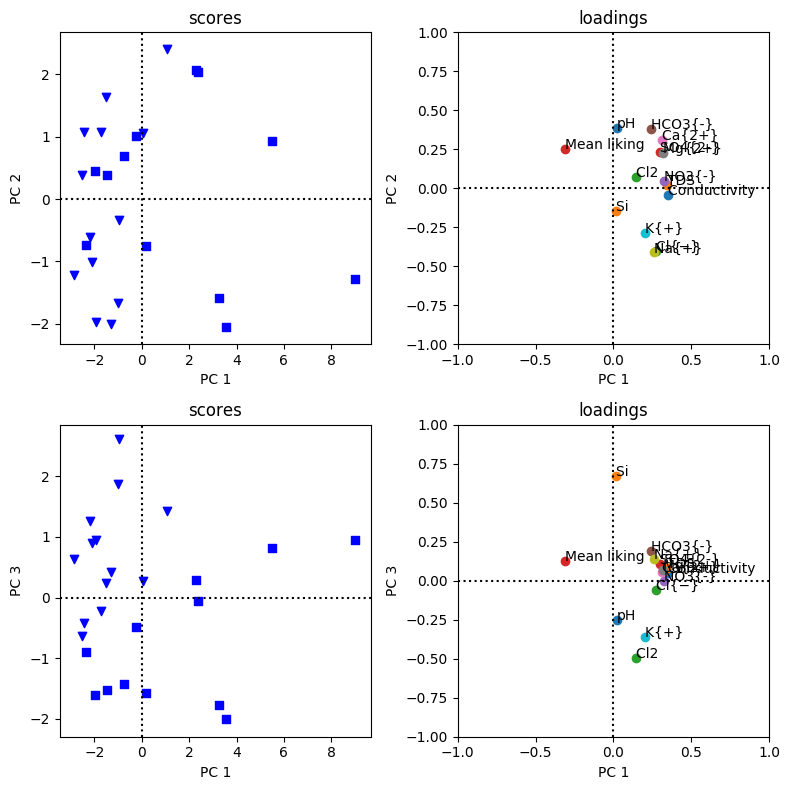

In [6]:
figs[1]

**Answer to question 7.1(b):**  We have performed a PCA analysis for the two data sets. The explained variance
as a function of principal components can be found in the pritns above, for the two data sets.

We find that:
* For data set 1: The two first principal components explain around $65$%
of the variance (around $40$% for the first principal component and around
$25$% for the second component).

* For data set 2: The two first principal components explain around $70$%
  of the variance (around $57$% for the first principal component and around
  $13$% for the second component).


The scores and loadings for the data sets are also shown in the figures above.

From these figures, we see the following:
* For data set 1: There is no clear separation into distinct groups in
  the plot of the scores. The plot of the loadings shows that many of
  the variables are correlated (for instance the amount of Na$^+$,
  Si and Cl$^-$). Along principal component 1 (PC1) we see that pH and the
  amount of K$^+$ are positively correlated with the liking.
  However, K$^+$ is negatively correlated with the liking along
  principal component 2 (PC2), and pH is less correlated with the liking
  along this axis.

* For data set 2: Here we see that when we consider PC1 and PC3, there
  seems to be a separation of the data into the two classes, bottled and
  tap water samples. Here is also seems that the tab water samples
  were, on average, less liked than the bottled water samples.
  Inspection of the loadings show that the mean liking is negatively
  correlated with the amount of Si, K$^+$, Na$^+$ and Cl$^-$. Further,
  there are some positive correlations between the mean liking and
  ions such as Mg$^{2+}$, Ca$^{2+}$, SO$_4^{2-}$ (along PC2).


**(c)** Let us start the modeling by creating a linear least-squares model:

* (i) Create linear least-squares models for the two data sets in which you use all available data in the fitting. Calculate $R^2$ and the root mean squared error (RMSE) of your models. Comment on the values you have obtained.
          

* (ii)  Evaluate the root mean squared error of cross-validation (RMSECV) for your two models. Compare the RMSECV values with the previously obtained RMSE values.
          
  
* (iii) Using the two models you have created, what variables seem to be most important for predicting a high mean liking? Here, you can inspect the regression coefficients (assuming that you have scaled the variables). If you were to create a new brand of bottled water, what chemical components would you focus on to maximize the mean liking?

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

for n, data in enumerate(datas):
    print("Data set {}".format(n+1))
    Y = data['Mean liking']
    var = [i for i in data.columns if i not in ["Labels", "Mean liking"]]
    Xs = data[var]
    X = scale(Xs)
    model = LinearRegression()
    model.fit(X, Y)
    
    # Do R2 scoring
    r2 = model.score(X, Y)
    
    # Do RMSE
    y_hat = model.predict(X)
    rmse = np.sqrt(mean_squared_error(Y, y_hat))
    
    # Do RMSEC
    scores = cross_val_score(model, X, Y,
                             scoring='neg_mean_squared_error',
                             cv=len(X))
    # Take the square root of -scores:
    rmsecv = np.sqrt(-scores)
  
    
    print("R2 score: {}".format(r2))
    print("RMSE score: {}".format(rmse))
    print("RMSECV score: {} ± {}".format(rmsecv.mean(), rmsecv.std()))
  
    coefs = model.coef_
    s = ""
    for name, coef in zip(var, coefs):
        s+="{} * {} + \n".format(coef, name.split()[0])
    print(s)

Data set 1
R2 score: 0.9728724295307305
RMSE score: 0.11950727033452274
RMSECV score: 0.49983112294136856 ± 0.38818501630869995
0.03613679957378595 * Conductivity + 
-0.5829659832594551 * TDS + 
-0.11676424529610174 * Cl{−} + 
-1.1656844535923805 * SO4{2-} + 
-0.1911145898711851 * NO3{-} + 
-0.1730453193528338 * HCO3{-} + 
2.4833561657705703 * Ca{2+} + 
-1.087663667191027 * Mg{2+} + 
-0.013539235134312289 * Na{+} + 
0.1941065831865264 * K{+} + 
0.2963508882385649 * pH + 
-0.39328960410530667 * Si + 

Data set 2
R2 score: 0.9670640989025614
RMSE score: 0.1989366199538996
RMSECV score: 0.44239187915329015 ± 0.4545743635373685
-4.097652681469615 * Conductivity + 
2.703814636558528 * TDS + 
0.41358671252494694 * Cl{−} + 
0.1662535969020218 * SO4{2-} + 
-0.0056179281558259575 * NO3{-} + 
0.7698302229386693 * HCO3{-} + 
-0.31808060493071433 * Ca{2+} + 
-0.21774325694399166 * Mg{2+} + 
0.34791894816312907 * Na{+} + 
-0.25622040007277347 * K{+} + 
0.1108044483590698 * pH + 
-0.4440055496489484

**Answer to question 7.1(c):** The predicted and measured mean likings for linear least-squares models are
shown above, together with the values of $R^2$, RMSE and RMSECV. The regression coefficients are shown in the other figure.

We see here that, for both data sets, we get a very high value of $R^2$. This
is maybe as expected since the number of variables we have is comparable to
the number of data points. This high $R^2$ does not necessarily mean that
our model is good. To investigate this further, we have calculated the average
RMSECV value.
Since we have a relatively low number of data points,
the RMSECV has here been calculated using the leave-one-out approach. We see here
that the RMSECV is considerably larger than the RMSE, $2$--$4$ times larger, and this
indicates that our model might be over-fitted. We should therefore be careful when
using this model for prediction, or, for making general statements.

In any case, based on these models we can try to formulate some interpretations:
* The regression coefficients for the model using data set 1
  indicate that the content of Ca$^{2+}$, SO$_4^{2+}$ and Mg$^{2+}$ influences the
  mean liking most. If we were to create a new brand of bottled water, we could try
  to focus on having a higher amount of Ca$^{2+}$, while keeping
  the amounts of SO$_4^{2+}$ and Mg$^{2+}$ low.

* The regression coefficients for the model using data set 2         
  indicate that the conductivity, TDS and HCO$_3^-$ are most important for the mean
  liking. If we were to create a new brand of bottled water, we could try to keep the
  conductivity low, while increasing the TDS and the amount of HCO$_3^-$.

Again, we repeat that our models are probably over-fitted and that we should not put too much
faith in the predictions we just made.



**(d)** We will now consider partial least-squares regression (PLSR) models.
Before we do the actual modeling, let us repeat the fundamental
equations for PLSR. The model itself is based on the following two
equations:
\begin{equation}
         \begin{split}
         \mathbf{X} &= \mathbf{T} \mathbf{P}^\top, \\
         \mathbf{Y} &= \mathbf{U} \mathbf{Q}^\top, \\
         \end{split}
         \tag{1}
      \end{equation}
      where $\mathbf{T}$ is the $x$-scores, $\mathbf{P}$ is the $x$-loadings,
      $\mathbf{U}$ is the $y$-scores, and $\mathbf{Q}$ is the $y$-loadings.
      The linear relation between $\mathbf{X}$ and $\mathbf{Y}$ is in this
      case given by,
      \begin{equation}
          \mathbf{Y} = \mathbf{T} \mathbf{Q}^\top.
          \label{eq:plsrreg} \tag{2}
      \end{equation}

When we wish to *predict* new $\mathbf{Y}$-values from new
      $\mathbf{X}$-values, we need to calculate new $x$-scores. This is
      done by introducing an additional matrix, $\mathbf{R}$, so that
      the following is satisfied:
      \begin{equation}
            \mathbf{T} = \mathbf{X} \mathbf{R}. 
          \label{eq:plsrscores} \tag{3}
      \end{equation}
      Here, we can think of the $\mathbf{R}$ as a matrix we can use to invert
      the relation $\mathbf{X} = \mathbf{T} \mathbf{P}^\top$. We can then predict
      new $\mathbf{Y}$-values, by combining Eq. \eqref{eq:plsrreg}
      and Eq. \eqref{eq:plsrscores}:
      \begin{equation}
        \mathbf{Y} = \mathbf{T} \mathbf{Q}^\top =
                     \mathbf{X} \mathbf{R} \mathbf{Q}^\top =
                     \mathbf{X} \mathbf{B}_\text{PLS},
                     \tag{4}
      \end{equation}
      where the regression coefficients $\mathbf{B}_\text{PLS}$ are given by:
      \begin{equation}
        \mathbf{B}_\text{PLS}  = \mathbf{R} \mathbf{Q}^\top. \tag{5}
      \end{equation}

In `sklearn` we can run PLSR by using `PLSRegression`
which is found in the module `sklearn.cross_decomposition`.
After running the regression, we can access the matrices given above with the python code below.

In [8]:
from sklearn.preprocessing import scale
from sklearn.cross_decomposition import PLSRegression
X = scale(X)
y = scale(Y)
plsr = PLSRegression(n_components=2)
plsr.fit(X, Y)
R = plsr.x_rotations_
B = plsr.coef_
Q = plsr.y_loadings_

* (i) Create PLSR models for the two data sets in which you use all available data in the fitting. Use 
  only two components when you create the model, that is, set `PLSRegression(n_components=2)` when
  you set up the models. Calculate $R^2$ and the root mean squared error (RMSE) of your models.
  Comment on the values you have obtained, and compare them with the corresponding values from your
  linear least-squares models.


* (ii) Calculate RMSECV for your two PLSR models. Compare the RMSECV values with the previously obtained
  RMSE values. Would you say that your PLSR models perform better or worse than the least-squares 
  models?


* (iii) Plot the $x$- and $y$-loadings for the two components. These loadings are available as 
  `Q = plsr.y_loadings_`. What variables seem to be most important for predicting the mean liking?


* (iv) Inspect the weights (the $\mathbf{R}$ matrix) for PLS component 1 and PLS component 2.
  Compare your results to the results given by 
  [Platikanov et al.](https://doi.org/10.1016/j.watres.2012.10.040) in Fig. $6$.


* (v) Based on the PLSR results: If you were to create
  a new brand of bottled water, what chemical components
  would you focus on to maximize the mean liking?


<IPython.core.display.Javascript object>


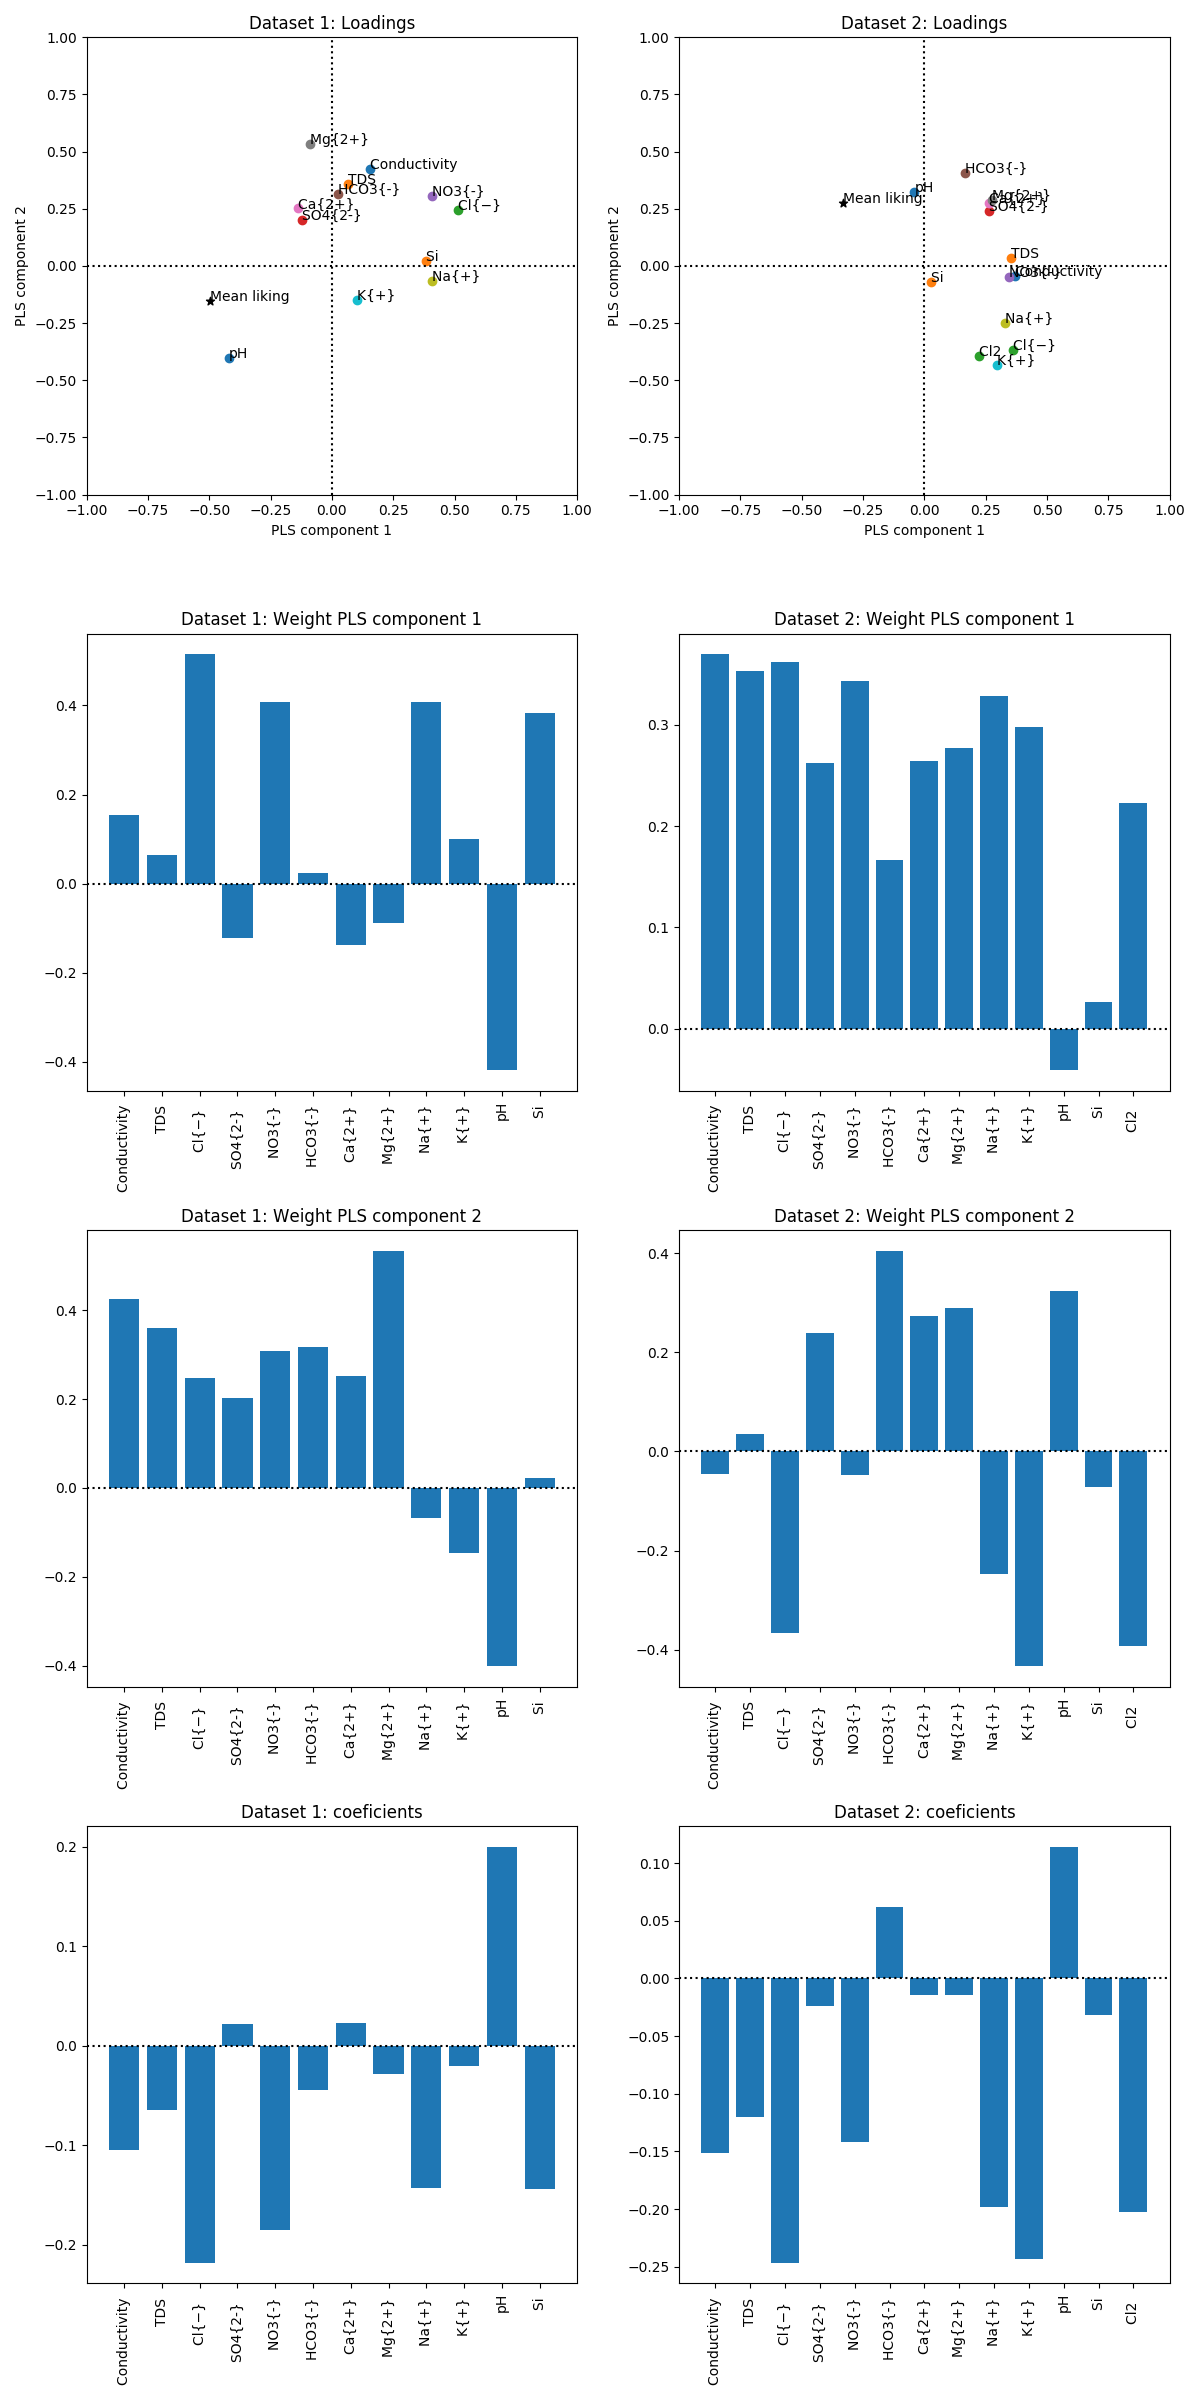

Data set 1
R2 score: 0.7220887157858391
RMSE score: 0.3825092722492493
RMSECV score: 0.41583993241504336 ± 0.3267501504644425

Data set 2
R2 score: 0.888498371342172
RMSE score: 0.3660332730712415
RMSECV score: 0.4153333222643801 ± 0.29242597240444645



In [9]:
fig1, axs1 = plt.subplots(4, 2, figsize=(12, 24))
axs1 = axs1.flatten()

for n, data in enumerate(datas):
    print("Data set {}".format(n+1))
    Y = data['Mean liking']
    var = [i for i in data.columns if i not in ["Labels", "Mean liking"]]
    Xs = data[var]
    X = scale(Xs)
    model = PLSRegression(n_components=2)
    model.fit(X, Y)
    
    # Do R2 scoring
    r2 = model.score(X, Y)
    
    # Do RMSE
    y_hat = model.predict(X)
    rmse = np.sqrt(mean_squared_error(Y, y_hat))
    
    # Do RMSEC
    scores = cross_val_score(model, X, Y,
                             scoring='neg_mean_squared_error',
                             cv=len(X))
    # Take the square root of -scores:
    rmsecv = np.sqrt(-scores)

    
    print("R2 score: {}".format(r2))
    print("RMSE score: {}".format(rmse))
    print("RMSECV score: {} ± {}".format(rmsecv.mean(), rmsecv.std()))
    
    R = model.x_rotations_
    B = model.coef_
    Q = model.y_loadings_
    
    ax = axs1[n]
    ax.scatter(Q.T[0], Q.T[1], marker='*', c="k")
    ax.annotate("Mean liking", (Q.T[0], Q.T[1]))
    for j, (xi, yi) in enumerate(zip(R.T[0], R.T[1])):
        ax.scatter(xi, yi)
        ax.annotate(var[j].split('(')[0], (xi, yi))

    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.axhline(y=0, ls=":", c="k")
    ax.axvline(x=0, ls=":", c="k")
    ax.set_title("Dataset {}: Loadings".format(n+1))
    ax.set_xlabel("PLS component 1")
    ax.set_ylabel("PLS component 2")

    names = [name.split("(")[0] for name in var]
    xs = [i+0.5 for i in range(len(names))]
    bar_datas = [R.T[0], R.T[1], B]
    titles = ["Weight PLS component 1", "Weight PLS component 2", "coeficients"]
    axs = [axs1[n+i] for i in range(2, 7, 2)]
    for bard, title, ax in zip(bar_datas, titles, axs):     
        ax.set_title("Dataset {}: ".format(n+1)+title)
        ax.bar(xs, bard.flatten())
        ax.axhline(y=0, ls=':', c='k')
        ax.set_xticks(xs)
        ax.set_xticklabels(names, rotation=90, ha='center')    

    print()
fig1.tight_layout()

**Answer to question 7.1(d):** The values of $R^2$, RMSE and RMSECV. are printed by the code above. Also, the loadings for the two PLS components, the weights of every variable per PLS component and the regression coefficients are shown in the plots above.

We see that the $R^2$ values are smaller than the corresponding values
from the least-squares fit and that the RMSE values are larger.
However, when calculating the RMSECV we see that the values are more consistent
for the PLSR models and comparable in size to the RMSE values. We can take
this as indicating that our models are *not* over-fitted.

In this case, we would prefer the PLSR models over the least-squares models, even though
the $R^2$ is smaller for the PLSR models: For the PLSR models, we know that we will make
errors when predicting the mean liking for new samples, and we know that these
errors will probably be smaller than the errors made with the least-squares models.

From the loading plots we find the following:

For data set 1, we find that the pH is positively correlated with the
mean liking and that ions such as NO$_3^-$ and Cl$^-$ are negatively correlated.

For data set 2, we also find a positive correlation of the mean liking with
the pH, and negative correlations with ions such as Na$^+$, Cl$^-$, K$^+$, and
with the amount of Cl$_2$.

From the weighting plots we see that these weights are comparable to the weights given by
[Platikanov et al.](https://doi.org/10.1016/j.watres.2012.10.040) (see their Fig. $6$), 
however, we note that our coefficients are normalized differently. 
Further, we make the following observations:

* The coefficients for PLS component 1 and 2
  in data set 1 seems to be the opposite of the coefficients of
  Platikanov et al. This can be explained with the loadings plot where we see that
  our $y$ has negative loadings for both PLS components ($y$ is located at
  negative positions on both PLS axis in that plot).

* We see also that our coefficients for PLS component 1
  in data set 2 is the opposite of the coefficients of Platikanov et al.
  Again, this can be explained by noting the sign of the loading for $y$ on PLS
  component 1 in the loading plot, where $y$ is located at a negative
  position along PLS component axis 1.

The lesson to be learned from the two points above is that we need both the
loadings and the weights when we are to interpret the weights, and if they are
positively or negatively correlated with the response ($y$).


Finally, let us try to summarize our findings by predicting how to create
a new brand of bottled water:

* For data set 1, we see that we should try to keep the pH relatively high,
  while keeping the amounts of ions such as Cl$^-$, NO$_3^-$ and Na$^+$ low.
  Further, we should try to limit the amount of Si.

* For data set 2, we see that we actually should try to limit the amount of
  most of the dissolved ions, and in addition the amount of Cl$_2$. That is,
  high mineralized waters do not seem to give a high liking. Our finding
  about the amount of Cl$_2$ should not be a surprise if you have tasted
  chlorinated water. We also find that the pH is also positively correlated with
  the mean liking.
